In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout


2025-02-28 18:07:22.048669: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Load dataset
file_path = 'sorted_stock_data_cleaned_nica.csv'
data = pd.read_csv(file_path)

In [4]:
last_100_days=data.tail(50)

In [5]:
last_100_days.shape

(50, 9)

In [6]:
#scaling the data
# Normalize the dataset
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(last_100_days)


In [7]:
# input_sequence=data_scaled.copy()

In [8]:
# input_sequence

In [9]:
#  input_data = np.expand_dims(input_sequence, axis=0)  # Reshape for model input

In [10]:
data_scaled.shape

(50, 9)

In [11]:
from tensorflow.keras.models import load_model

# Load the saved Keras model
model = load_model('lstm50.keras')

# Now you can use the model to make predictions, evaluate, etc.


In [12]:
#making predictions
def predict_next_n_days(model, data_scaled, n_days=100):
    predictions=[]
    input_sequence=data_scaled.copy()

    for _ in range(n_days):
        input_data = np.expand_dims(input_sequence, axis=0)  # Reshape for model input
        next_day_features = model.predict(input_data, verbose=0)[0]  # Predict next day
        predictions.append(next_day_features)
        
        # Update input sequence: Remove first day, add predicted day
        next_day_input = np.append(input_sequence[1:], [next_day_features], axis=0)
        input_sequence = next_day_input
        
    return np.array(predictions)

In [13]:
# Example usage
# last_100_days = scaler.transform(last_100_days_raw)  # Normalize input if needed
predicted_features = predict_next_n_days(model, data_scaled, n_days=150)

In [14]:
predicted_features.shape

(150, 9)

In [15]:
predicted_features

array([[0.29531878, 0.2862701 , 0.2913668 , ..., 0.15564969, 0.02774915,
        0.80715364],
       [0.29206717, 0.28502125, 0.28743038, ..., 0.14492506, 0.05302742,
        0.7502498 ],
       [0.28921342, 0.2840942 , 0.28509554, ..., 0.13083793, 0.07738045,
        0.69364095],
       ...,
       [0.2048884 , 0.19849217, 0.20641433, ..., 0.02668621, 0.01589066,
        0.6232821 ],
       [0.20488834, 0.19849211, 0.20641428, ..., 0.02668618, 0.01589063,
        0.62328213],
       [0.20488833, 0.19849211, 0.20641425, ..., 0.02668619, 0.01589054,
        0.6232822 ]], dtype=float32)

In [16]:
predicted_features_inverse = scaler.inverse_transform(predicted_features)

In [17]:
predicted_features_inverse

array([[3.7376093e+02, 3.7932129e+02, 3.6893884e+02, ..., 1.9285960e+07,
        2.0641418e+00, 1.7616711e+02],
       [3.7353232e+02, 3.7924136e+02, 3.6868298e+02, ..., 1.8682868e+07,
        2.0861340e+00, 1.7289540e+02],
       [3.7333173e+02, 3.7918204e+02, 3.6853122e+02, ..., 1.7890688e+07,
        2.1073210e+00, 1.6964064e+02],
       ...,
       [3.6740366e+02, 3.7370349e+02, 3.6341693e+02, ..., 1.2033788e+07,
        2.0538249e+00, 1.6559534e+02],
       [3.6740366e+02, 3.7370349e+02, 3.6341693e+02, ..., 1.2033786e+07,
        2.0538249e+00, 1.6559534e+02],
       [3.6740366e+02, 3.7370349e+02, 3.6341693e+02, ..., 1.2033786e+07,
        2.0538247e+00, 1.6559534e+02]], dtype=float32)

In [18]:
predicted_features_inverse[0]

array([3.7376093e+02, 3.7932129e+02, 3.6893884e+02, 3.7025723e+02,
       1.5633587e-02, 5.6113500e+04, 1.9285960e+07, 2.0641418e+00,
       1.7616711e+02], dtype=float32)

In [19]:
predicted_features_inverse[0][3]

370.25723

In [20]:
x_future_close=predicted_features_inverse[:, 3]


In [21]:
x_future_close

array([370.25723, 370.1026 , 370.0059 , 369.97546, 369.90256, 369.71442,
       369.41   , 369.03107, 368.62894, 368.24152, 367.88934, 367.5786 ,
       367.30768, 367.07166, 366.86523, 366.6844 , 366.52557, 366.3864 ,
       366.2641 , 366.15738, 366.06442, 365.98315, 365.9119 , 365.84894,
       365.79306, 365.74255, 365.69687, 365.6548 , 365.6157 , 365.57886,
       365.54434, 365.51086, 365.47916, 365.44827, 365.41864, 365.39014,
       365.36276, 365.33636, 365.31152, 365.2872 , 365.26395, 365.24197,
       365.22104, 365.20108, 365.18234, 365.1647 , 365.14807, 365.13263,
       365.1185 , 365.10516, 365.09253, 365.0808 , 365.06992, 365.0598 ,
       365.05038, 365.04166, 365.03357, 365.02606, 365.0191 , 365.01263,
       365.0067 , 365.00116, 364.99606, 364.99136, 364.98697, 364.98294,
       364.97916, 364.97568, 364.9725 , 364.9695 , 364.96677, 364.9642 ,
       364.96188, 364.9597 , 364.95767, 364.95578, 364.95407, 364.95248,
       364.95102, 364.94965, 364.9484 , 364.94724, 

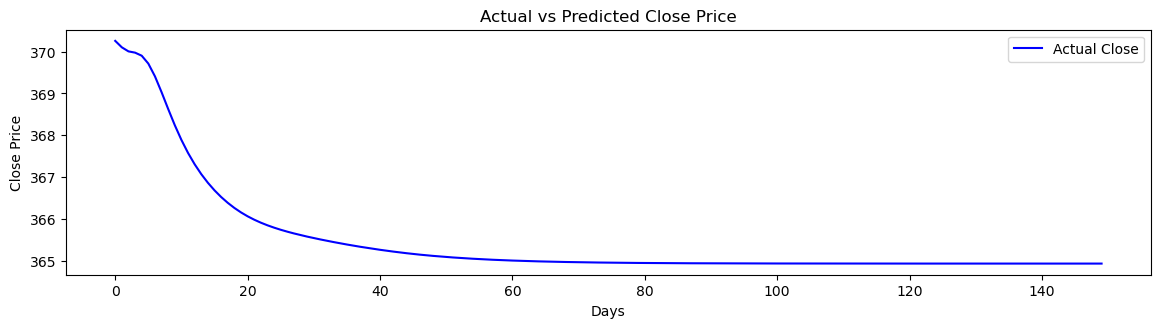

In [22]:
# Plot actual vs predicted values for Close and PE Ratio
plt.figure(figsize=(14, 7))

# Plot Close
plt.subplot(2, 1, 1)
plt.plot(x_future_close, label="Actual Close", color="blue")
# plt.plot(y_pred_close, label="Predicted Close", color="red")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.title("Actual vs Predicted Close Price")
plt.savefig('future_predict')
plt.legend()


In [23]:
# # Plot Close Price Prediction
# plt.figure(figsize=(12, 6))
# plt.plot(predicted_features_inverse[:, 3], label="Predicted Close Price", linestyle="dashed", color="red")  # Close price
# plt.plot(predicted_features_inverse, predicted_features[:, 1], label="Predicted High", linestyle="dashed", color="blue")  # High
# plt.plot(predicted_features_inverse, predicted_features[:, 2], label="Predicted Low", linestyle="dashed", color="green")  # Low
# plt.xlabel("Date")
# plt.ylabel("Stock Price & Features")
# plt.title("Stock Feature Predictions for the Next 100 Days")
# plt.legend()
# plt.show()